In [12]:
#import dependencies 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import random
from PIL import Image, ImageDraw
from tensorflow.keras.preprocessing import image
from PIL import ImagePath 
import imageio
import matplotlib as mpl
import matplotlib.image as mpimg
import scipy.ndimage as ndi
from basic_image_eda import BasicImageEDA
#from tensorflow.keras.applications import VGG16


**Investigating a single image from the dataset**

In [2]:
#investigate a single image from positive dataset
pos_path = '/dataset/train/POSITIVE/'
def load_image(path):
    for img in os.listdir(pos_path):
        print('Image name =', img)
        image = cv.imread(os.path.join(pos_path, img))
        break

    return image

Image name = Positive_163_Coronary_221_LAD_Secondary2_18.png
The dimensions are 299 pixels height and 299 pixels width
The maximum pixel value is 163.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 62.3081
The standard deviation is 43.2523


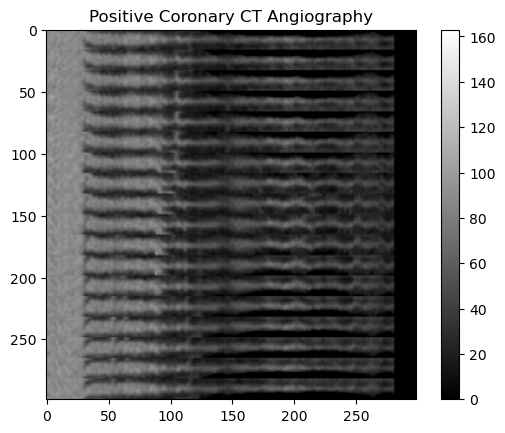

In [3]:
pos_path = './dataset/train/POSITIVE/'

image = load_image(pos_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Positive Coronary CT Angiography')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")


In [4]:
#investigate a single image from negative dataset
neg_path = '/dataset/train/NEGATIVE/'
def load_image(path):
    for img in os.listdir(neg_path):
        print('Image name =', img)
        image = cv.imread(os.path.join(neg_path, img))
        break

    return image

Image name = Negative_105_Coronary_015_RCA_Secondary2_1.png
The dimensions are 299 pixels height and 299 pixels width
The maximum pixel value is 104.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 36.9210
The standard deviation is 35.8445


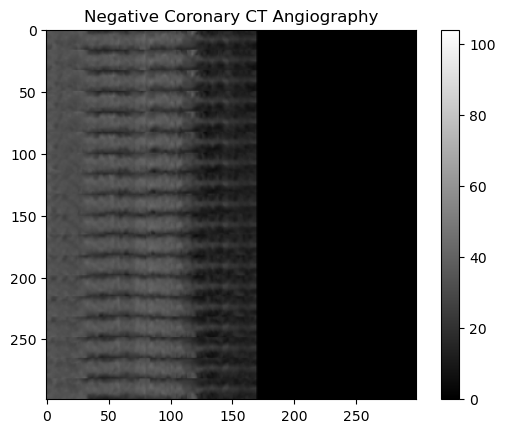

In [5]:
neg_path = './dataset/train/NEGATIVE/'

image = load_image(neg_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Negative Coronary CT Angiography')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")


**Investigating multiple images from the dataset**

In [13]:
train_dir = 'dataset/train/'
pos_imgs = [fn for fn in os.listdir(f'{train_dir}/POSITIVE') if fn.endswith('.png')]
neg_imgs = [fn for fn in os.listdir(f'{train_dir}/NEGATIVE') if fn.endswith('.png')]

In [14]:
select_pos = np.random.choice(pos_imgs, 3, replace = False)
select_neg = np.random.choice(neg_imgs, 3, replace = False)

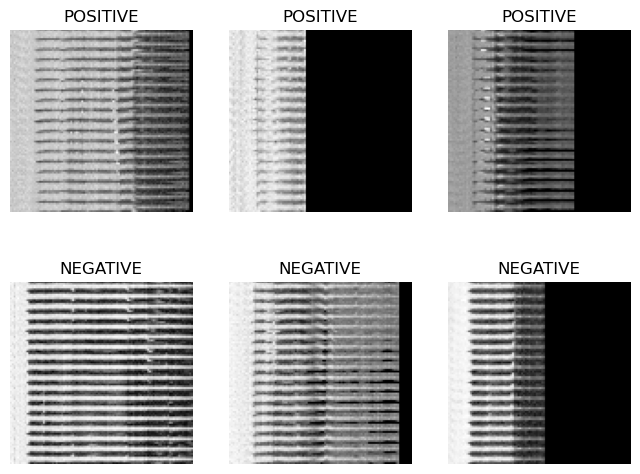

In [15]:
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/POSITIVE/{select_pos[i]}'
        label = 'POSITIVE'
    else:
        fp = f'{train_dir}/NEGATIVE/{select_neg[i-3]}'
        label = 'NEGATIVE'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')

**Loading images and labels together, resizing them & creating dataframe**

In [16]:
#load the path of the train images
path = 'dataset/train/'
train = os.listdir(path)

In [17]:
#there are two folders in the train dataset, positive and negative
folders=[]
folders=[f for f in sorted(os.listdir(path)) if not f.startswith('.')]
print(folders)

['Negative', 'Positive']


In [20]:
labels = folders
print (f'The labels are {labels}') 

#setting the size of images we want
image_size = 100
print(f'All images to be resized into {image_size}x{image_size} pixels')

The labels are ['Negative', 'Positive']
All images to be resized into 100x100 pixels


In [50]:
# Get a list of subdirectories (labels)
labels = [label for label in os.listdir(path) if not label.startswith('.')]

# Function to load images and labels
def load_train(path, labels):
    images = []
    label_enum = 0
    image_names = []
    label_list = []
    
    # Iterate over each label
    for label in labels:
        # Get the path to the label directory
        label_dir = os.path.join(path, label)
        
        # Iterate over each image in the label directory
        for image_name in os.listdir(label_dir):
            # Read and resize the image
            image_path = os.path.join(label_dir, image_name)
            image_read = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read, (image_size, image_size))
            
            # Append the resized image to the images list
            images.append(image_resized)
            
            # Append the label enum to the label_list
            label_list.append(label_enum)
            
            # Append the image name to the image_names list
            image_names.append(image_name)
        
        # Increment the label enum for the next label
        label_enum += 1
    
    # Convert lists to numpy arrays
    images = np.array(images)
    label_list = np.array(label_list)
    
    return images, label_list, image_names




In [59]:
# Load images, labels, and image names
train_images, train_labels, image_names = load_train(path, labels)
print(f'Shape of the training images = {train_images.shape}')
print(f'Shape of the training labels = {train_labels.shape}')

Shape of the training images = (4668, 100, 100)
Shape of the training labels = (4668,)


In [67]:
# Create a DataFrame with image filenames and their labels
df = pd.DataFrame({'Image Name': image_names, 'Label': train_labels})

# Map label numbers to label names
df['Label'] = df['Label'].map({i: label for i, label in enumerate(labels)})


In [4]:
# Display the DataFrame
df

NameError: name 'df' is not defined

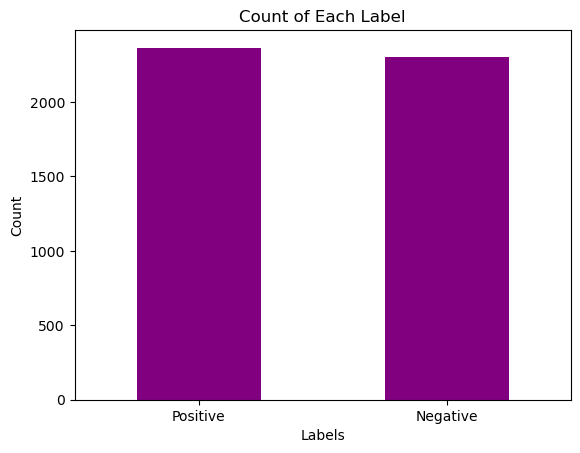

Number of Positive images: 2364
Number of Negative images: 2304


In [69]:
# Plotting the count of each label
label_counts = df['Label'].value_counts()
label_counts.plot(kind='bar', color='purple')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.xticks(rotation=0)
plt.show()

for label, count in label_counts.items():
    print(f'Number of {label} images: {count}')

**Visualization of images**

**POSITIVE for coronary artery disease**

(299, 299, 3)
[[11 11 11 ...  0  0  0]
 [10 11 11 ...  0  0  0]
 [10 11 11 ...  0  0  0]
 ...
 [11 11 11 ...  0  0  0]
 [11 11 11 ...  0  0  0]
 [11 11 11 ...  0  0  0]]


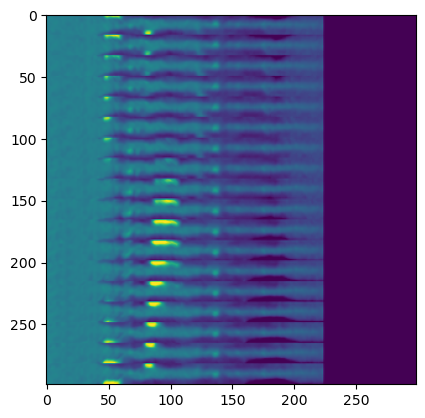

In [70]:
img = Image.new('RGB', (28,28))
img_pos = ImageDraw.Draw(img)
img = cv.imread('dataset/train/POSITIVE/Positive_255_Coronary_073_LAD_Secondary2_16.png')
img = np.array(img)

plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])

**NEGATIVE for coronary artery disease**

(299, 299, 3)
[[7 7 7 ... 0 0 0]
 [7 7 7 ... 0 0 0]
 [7 7 7 ... 0 0 0]
 ...
 [7 7 7 ... 0 0 0]
 [7 7 7 ... 0 0 0]
 [7 7 7 ... 0 0 0]]


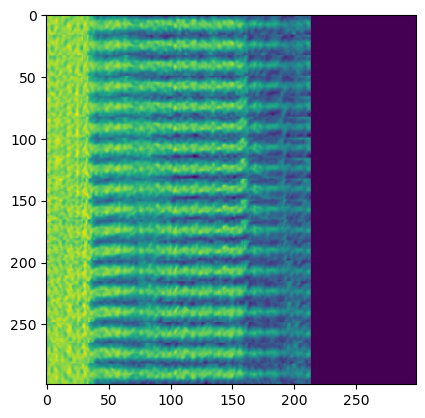

In [71]:
img = Image.new('RGB', (28,28))
img_neg = ImageDraw.Draw(img)
img = cv.imread('dataset/train/NEGATIVE/Negative_92_Coronary_411_RCA_Secondary1_16.png')
img = np.array(img)

plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])

In [82]:
df.to_csv('train.csv', index=False)

HISTOGRAM

POSITIVE